Generation 1: Best Fitness = 1492.3613726219533
Generation 2: Best Fitness = 1492.3613726219533
Generation 3: Best Fitness = 1492.3613726219533
Generation 4: Best Fitness = 1492.3613726219533
Generation 5: Best Fitness = 1492.3613726219533
Generation 6: Best Fitness = 1492.3613726219533
Generation 7: Best Fitness = 1492.3613726219533
Generation 8: Best Fitness = 1492.3613726219533
Generation 9: Best Fitness = 1492.3613726219533
Generation 10: Best Fitness = 1492.3613726219533
Generation 11: Best Fitness = 1492.3613726219533
Generation 12: Best Fitness = 1492.3613726219533
Generation 13: Best Fitness = 1492.3613726219533
Generation 14: Best Fitness = 1492.3613726219533
Generation 15: Best Fitness = 1492.3613726219533
Generation 16: Best Fitness = 1492.3613726219533
Generation 17: Best Fitness = 1492.3613726219533
Generation 18: Best Fitness = 1492.3613726219533
Generation 19: Best Fitness = 1492.3613726219533
Generation 20: Best Fitness = 1492.3613726219533
Generation 21: Best Fitness =

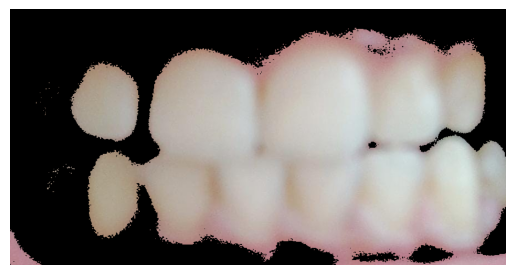

In [1]:
# Levy fonksiyonu olmadan FPA


import numpy as np
import cv2
import matplotlib.pyplot as plt

def fitness_function(image, threshold):
    # İki bölgeye ayırma: Eşik değerinin altında ve üstünde
    region1 = image[image < threshold]
    region2 = image[image >= threshold]

    # Eğer bölgelerden biri boş ise, uygunluk değeri -sonsuz döner
    if len(region1) == 0 or len(region2) == 0:
        return -np.inf

    # İki bölge için ortalama değerler
    beta_k1 = np.mean(region1)
    beta_k2 = np.mean(region2)

    # İki bölge için ağırlıklar
    alpha_k1 = len(region1) / (len(region1) + len(region2))
    alpha_k2 = 1 - alpha_k1

    # İlk değeri hesapla (lambda_n)
    lambda_n = np.histogram(image, bins=np.arange(257), density=True)[0]

    # İkinci değeri hesapla (eta)
    eta = np.sum([n * lambda_n_val for n, lambda_n_val in enumerate(lambda_n)])

    # Uygunluk fonksiyonunu maksimize etmek istediğimiz değeri hesapla
    maximize_fitness = alpha_k1 * (beta_k1 - eta)**2 + alpha_k2 * (beta_k2 - eta)**2

    if np.isnan(maximize_fitness):
        return -np.inf

    return maximize_fitness

def initialize_population(pop_size, bounds):
    # Popülasyonu belirtilen sınırlar arasında rastgele başlat
    return np.random.uniform(bounds[0], bounds[1], (pop_size, 1))

def flower_pollination_algorithm(image, pop_size, bounds, max_generations, p=0.8):
    # Başlangıç popülasyonunu oluştur
    population = initialize_population(pop_size, bounds)

    # Başlangıçta en iyi çiçeği bul
    best_flower_index = np.argmax([fitness_function(image, x) for x in population])
    best_flower = population[best_flower_index]
    best_fitness = fitness_function(image, best_flower)

    for generation in range(max_generations):
        for i in range(pop_size):
            flower = population[i]
            random_value = np.random.rand()

            # Global veya lokal güncelleme
            if random_value < p:
                # Global güncelleme
                new_flower = flower + np.random.normal(0, 1) * (best_flower - flower)
            else:
                # Lokal güncelleme
                j, k = np.random.choice([idx for idx in range(pop_size) if idx != i], 2)
                epsilon = np.random.rand()
                new_flower = flower + epsilon * (population[j] - population[k])

            # Yeni çiçeği sınırlar içinde tut
            new_flower = np.clip(new_flower, bounds[0], bounds[1])

            # Eğer yeni çiçek daha uygunsa, güncelle
            if fitness_function(image, new_flower) > fitness_function(image, flower):
                population[i] = new_flower

            # Eğer yeni çiçek en iyi uygunluksa, güncelle
            if fitness_function(image, new_flower) > best_fitness:
                best_flower = new_flower
                best_fitness = fitness_function(image, best_flower)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

    return best_flower[0]

image_path = '/content/WhatsApp Image 2023-08-08 at 13.36.28.jpeg'

# Görüntüyü yükleyin
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Gri tonlamalı bir versiyonunu alın
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# En iyi çiçeği bulun (eşik değeri)
threshold = flower_pollination_algorithm(gray_image, pop_size=20, bounds=(0, 255), max_generations=50)

# Maskeyi oluşturun
mask = gray_image >= threshold

# Renkli görüntüde maskeyi uygulayın
segmented_image = np.zeros_like(original_image)
for i in range(3):  # RGB kanalları için
    segmented_image[..., i] = original_image[..., i] * mask

# Segment edilen renkli görüntüyü gösterin
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


In [ ]:
# Levy fonksiyonu ile FPA

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid  # Sigmoid fonksiyonu için

# Lévy uçuşu için yardımcı fonksiyon
def calculate_L(sigma, s):
    return (sigma * sigmoid(sigma) * np.sin(np.pi * sigma / 2)) / (np.pi * (1/s + sigma))

# Fitness fonksiyonu görüntü bölme işlemi için
def fitness_function(image, threshold):
    region1 = image[image < threshold]
    region2 = image[image >= threshold]

    # Eğer bölgeler boşsa, uygunluk değeri -sonsuz döner
    if len(region1) == 0 or len(region2) == 0:
        return -np.inf

    # Her iki bölge için ortalama hesaplama
    beta_k1 = np.mean(region1)
    beta_k2 = np.mean(region2)

    # Her iki bölgenin ağırlıklarını hesaplama
    alpha_k1 = len(region1) / (len(region1) + len(region2))
    alpha_k2 = 1 - alpha_k1

    # İmage histogramını hesaplama
    lambda_n = np.histogram(image, bins=np.arange(257), density=True)[0]
    eta = np.sum([n * lambda_n_val for n, lambda_n_val in enumerate(lambda_n)])

    # Uygunluk değerini hesaplama
    maximize_fitness = alpha_k1 * (beta_k1 - eta)**2 + alpha_k2 * (beta_k2 - eta)**2

    if np.isnan(maximize_fitness):
        return -np.inf

    return maximize_fitness

# Popülasyon başlangıç değerlerini oluşturma
def initialize_population(pop_size, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, 1))

# Çiçek tozlaşma algoritması (Flower Pollination Algorithm)
def flower_pollination_algorithm(image, pop_size, bounds, max_generations, p=0.8, gamma=0.01, sigma=0.5, s=2.0):
    population = initialize_population(pop_size, bounds)
    best_flower_index = np.argmax([fitness_function(image, x) for x in population])
    best_flower = population[best_flower_index]
    best_fitness = fitness_function(image, best_flower)

    # Her nesilde popülasyonu güncelleme
    for generation in range(max_generations):
        for i in range(pop_size):
            flower = population[i]
            random_value = np.random.rand()
            L = calculate_L(sigma, s)  # Lévy uçuşu hesaplama

            # Yerel veya global arama koşulları
            if random_value < p:
                new_flower = flower + gamma * L * (best_flower - flower)
            else:
                j, k = np.random.choice([idx for idx in range(pop_size) if idx != i], 2)
                new_flower = flower + L * (population[j] - population[k])

            new_flower = np.clip(new_flower, bounds[0], bounds[1])

            # Eğer yeni çiçek daha iyi ise, onu kabul et
            if fitness_function(image, new_flower) > fitness_function(image, flower):
                population[i] = new_flower

            # En iyi çiçeği güncelleme
            if fitness_function(image, new_flower) > best_fitness:
                best_flower = new_flower
                best_fitness = fitness_function(image, best_flower)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

    return best_flower[0]

# Görüntüyü yükleyin
image_path = '/content/Project/WhatsApp Image 2023-08-08 at 13.36.28.jpeg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Gri tonlamalı bir versiyonunu alın
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# En iyi çiçeği bulun (eşik değeri)
threshold = flower_pollination_algorithm(gray_image, pop_size=20, bounds=(0, 255), max_generations=50)

# Maskeyi oluşturun
mask = gray_image >= threshold

# Renkli görüntüde maskeyi uygulayın
segmented_image = np.zeros_like(original_image)
for i in range(3):  # RGB kanalları için
    segmented_image[..., i] = original_image[..., i] * mask

# Segment edilen renkli görüntüyü gösterin
plt.imshow(segmented_image)
plt.axis('off')
plt.show()
